+----+---------------+-----+---------------+----------------------------+
| SN |    Features   | Sum | Similarity ID | Total Number of Duplicates |
+----+---------------+-----+---------------+----------------------------+
| 0  |       10      |     |               |                            |
| 1  | 1,1,0,1,2,5,7 |  17 |       3       |             3              |
| 2  | 0,0,1,2,3,2,1 |  9  |               |             6              |
| 3  | 1,1,0,1,2,5,7 |  17 |       1       |             3              |
| 4  | 1,1,0,2,1,5,6 |  16 |       6       |             3              |
| 5  | 1,1,2,2,3,3,4 |  16 |       9       |             6              |
| 6  | 1,1,0,2,1,5,6 |  16 |       4       |             3              |
| 7  | 0,0,0,6,7,1,2 |  16 |               |             3              |
| 8  | 3,4,5,1,3,5,3 |  24 |               |             5              |
| 9  | 1,1,2,2,3,3,4 |  16 |       5       |             6              |
| 10 | 1,1,3,2,3,3,3 |  16 |          

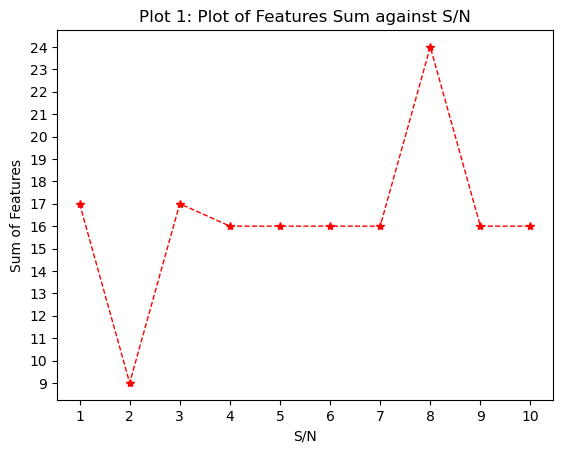

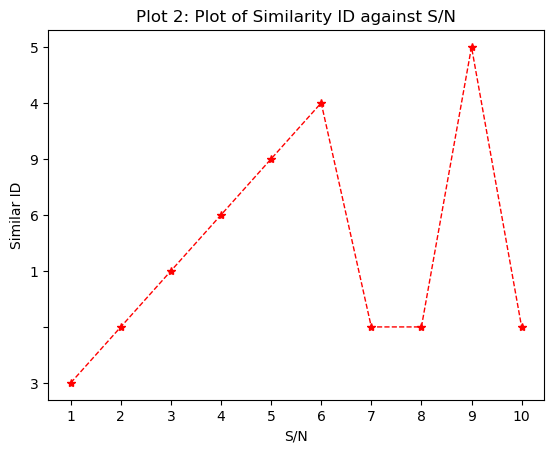

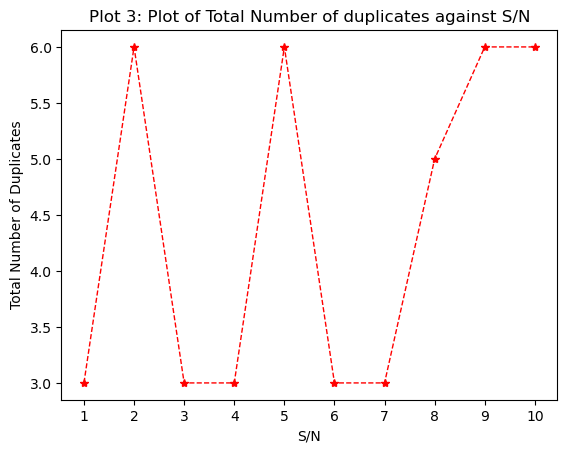

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable
from collections import Counter

import copy

def App():

    # open the file
    with open("terrorist.txt") as f:
        content_list = f.readlines()

    #strip the newline characters
    content_list = [x.strip() for x in content_list]

    # create arrays to store data
    file_list = [] #store each line of file as a list of integers
    sum_list = [] #store the sum of each line of features
    index_list = [] #store the index of each line of features
    duplicate_list = [] #store the total amount of duplicates in each line of features


    def convert_toInt():        
        for item in content_list:
        #     convert each row of file to a list of integers and append to the file_list list

            l = item.split(",")

            k = list(map(int,l))
            file_list.append(k)
            
    def get_duplicates():
#         loop through each list in the file_list array
        for i in range(1, len(file_list)):
            
#             create a dictionary containing the elements and the number of appearance as key, value pairs in a dictionary
            counts_dict = dict(Counter(file_list[i]))    
            
#             extract key:value pairs where the value is greater than 1 into another dict - duplicates_dict
            duplicates_dict = {key:value for key, value in counts_dict.items() if value > 1}
            
#             append the sume of each values in the dict to the duplicate_list list
            duplicate_list.append(sum((duplicates_dict.values())))
    
        

    def get_sum():
        for i in range(1,len(file_list)):
            sum_list.append(sum(file_list[i]))
            index_list.append(i)

    def get_similarID():
        similarID_list = [" "] * len(file_list);


        for i in range (0,  len(file_list)):
            for j in range(0, len(file_list)):
                if(file_list[i] == file_list[j] and i != j ):
                    similarID_list[i] = j


        # string to hold the string version of the values in similarID_list
        string_similarID_list = [str(x) for x in similarID_list]
        
        get_table(similarID_list)
        get_graph(similarID_list,string_similarID_list)

    def get_table(similarID_list):
        myTable = PrettyTable()
        myTable.add_column("SN", [0] + index_list)
        myTable.add_column("Features", content_list)
        myTable.add_column("Sum", [" "] + sum_list) 
        myTable.add_column("Similarity ID", similarID_list)
        myTable.add_column("Total Number of Duplicates", [" "] + duplicate_list)
        print(myTable)

    def get_graph(similarID_list, string_similarID_list):
        plt.plot(index_list,sum_list,c='r',ls="--",lw="1",marker= '*')
        plt.xticks(np.arange(1,len(index_list) + 1,1))
        plt.yticks(np.arange(min(sum_list),max(sum_list) + 1,1))
        plt.xlabel("S/N")
        plt.ylabel("Sum of Features")
        plt.title("Plot 1: Plot of Features Sum against S/N")
        plt.show()


        plt.plot(index_list,string_similarID_list[1: ],c='r',ls="--",lw="1",marker= '*')
        plt.xticks(np.arange(1,len(index_list) + 1,1))
        plt.xlabel("S/N")
        plt.ylabel("Similar ID")
        plt.title("Plot 2: Plot of Similarity ID against S/N")
        plt.show()
        
        plt.plot(index_list,duplicate_list,c='r',ls="--",lw="1",marker= '*')
        plt.xticks(np.arange(1,len(duplicate_list) + 1,1))
        plt.xlabel("S/N")
        plt.ylabel("Total Number of Duplicates")
        plt.title("Plot 3: Plot of Total Number of duplicates against S/N")
        plt.show()
        
    
    convert_toInt()
    get_duplicates()
    get_sum()
    get_similarID()
    
    


App()
